In [1]:
import sys

print(f"Interpreter dir: {sys.executable}")
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("../")

print(f"Working dir: {os.getcwd()}")
%load_ext autoreload
%autoreload 2

Interpreter dir: /Users/jsg/Documents/Stor/PdM_mockup/.venv_storpdm/bin/python3
Working dir: /Users/jsg/Documents/Stor/PdM_mockup


In [17]:
# Data
import pandas as pd

# PLotting
import matplotlib.pyplot as plt
import plotly

# plotly.offline.init_notebook_mode(connected=True)

# Custom package
from storpdm import DATA_PATH
from storpdm.make_dataset import download_dataset, import_dataset
from storpdm.visualize import (
    visualise_sensor_correlation_all_engine,
    visualise_sensor_data_distribution,
    plot_time_history_all_engines
)
from storpdm.build_features import (
    find_correlated_data,
    list_correlated_data,
    find_time_independent_columns,
    add_calculated_rul
)

---

# Load data

In [3]:
# download_dataset()

In [4]:
df_rul, df_train, df_test = import_dataset(filename="FD001")

In [5]:
display(df_rul)
display(df_train)
display(df_train)

,rul
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


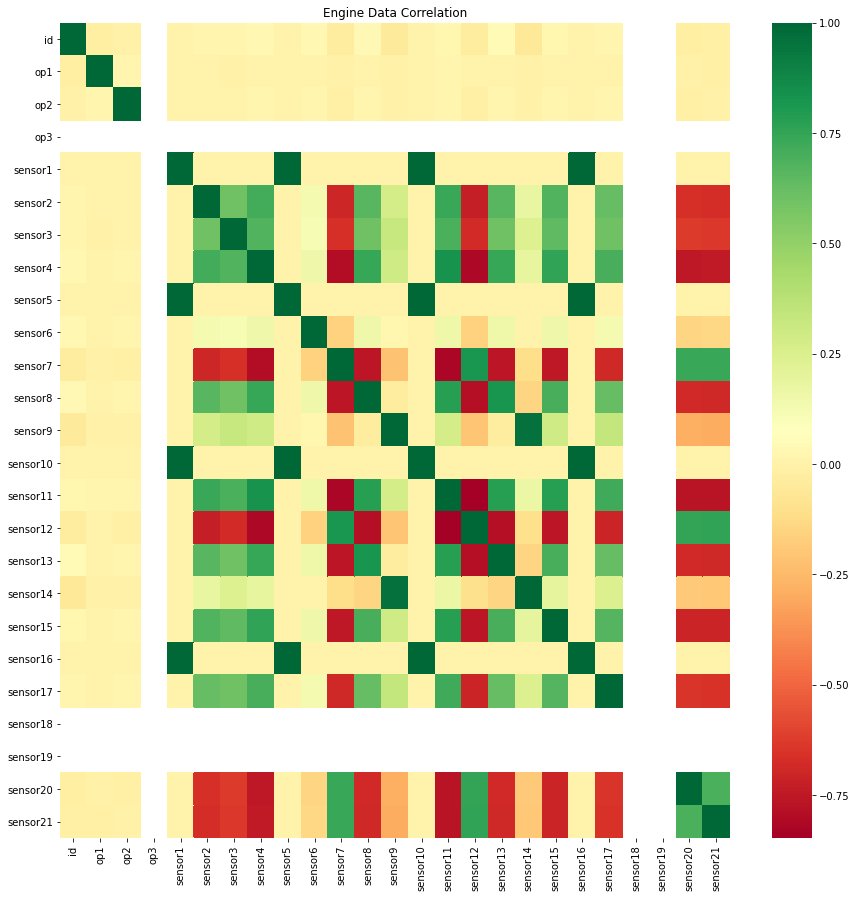

In [6]:
plt.figure(figsize=(15, 15))
visualise_sensor_correlation_all_engine(df_train)

# Data processing

- Remove correlated sensors
- Constant data with time
- ...

In [7]:
# Reduce / Eliminate highly-correlated sensors.
correlation_threshold = 0.95
correlated_data = find_correlated_data(df_train, correlation_threshold)

In [8]:
columns_to_be_removed = list_correlated_data(correlated_data)

In [9]:
columns_to_be_removed

['sensor5', 'sensor10', 'sensor16', 'sensor14']

In [10]:
print(f"Removing {columns_to_be_removed} from columns")
df_train_proc = df_train.drop(columns_to_be_removed, axis=1)

Removing ['sensor5', 'sensor10', 'sensor16', 'sensor14'] from columns


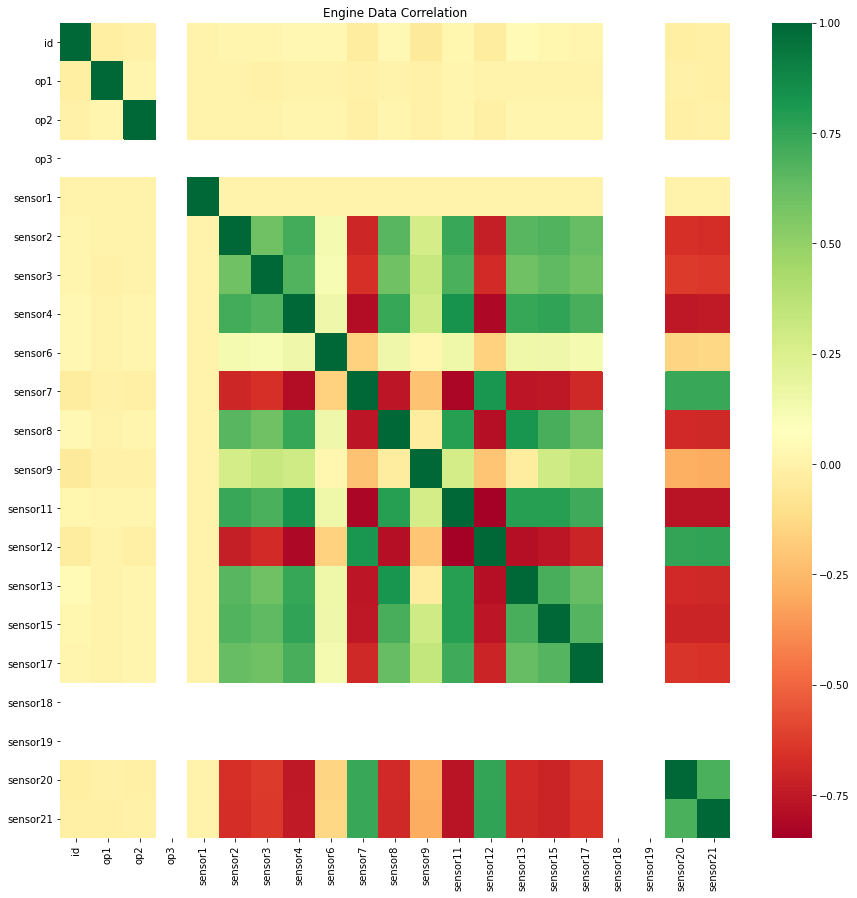

In [11]:
# Visualise correlations, extreme ones should have been removed
plt.figure(figsize=(15, 15))
visualise_sensor_correlation_all_engine(df_train_proc)

/Users/jsg/Documents/Stor/PdM_mockup/.venv_storpdm/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/jsg/Documents/Stor/PdM_mockup/.venv_storpdm/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/jsg/Documents/Stor/PdM_mockup/.venv_storpdm/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/jsg/Documents/Stor/PdM_mockup/.venv_storpdm/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

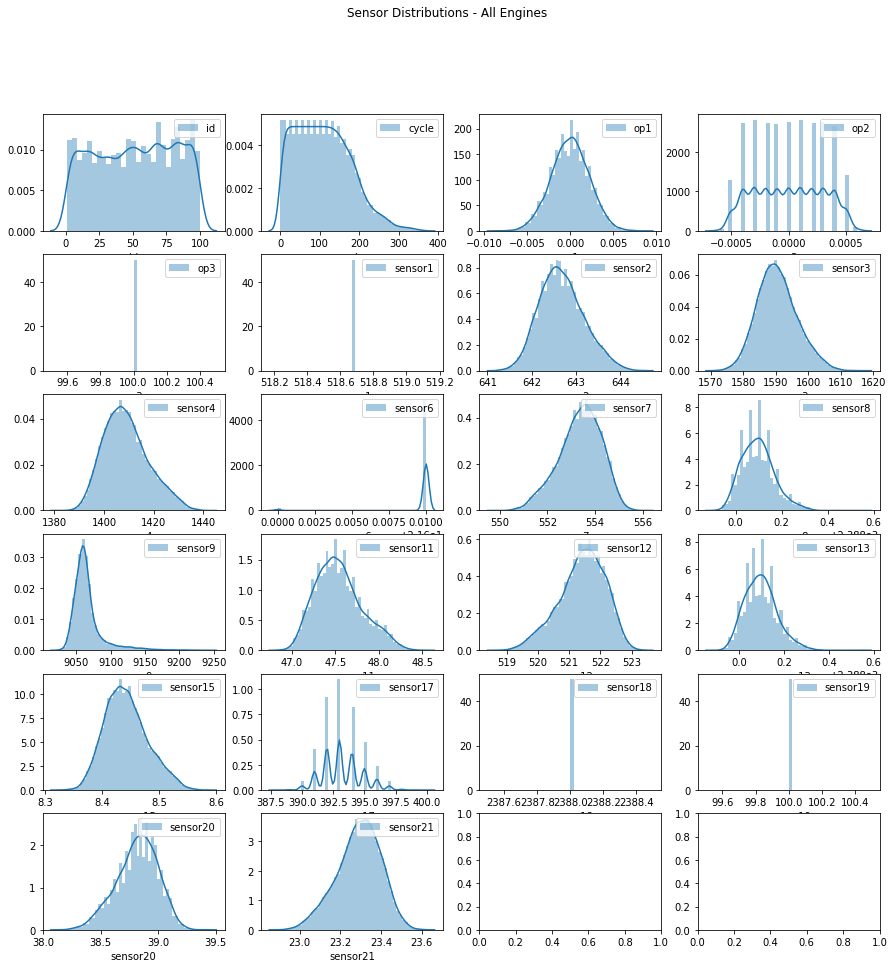

In [12]:
plt.figure(figsize=(15, 15))
fig = visualise_sensor_data_distribution(df_train_proc)

In [30]:
# Sample time series
# Remove data that does not change with time.
time_independent_columns = find_time_independent_columns(df_train_proc)

df_train_proc2 = df_train_proc.drop(time_independent_columns, axis=1)

print(df_train_proc2.info)

<bound method DataFrame.info of         id  cycle     op1     op2  sensor2  sensor3  sensor4  sensor7  \
0        1      1 -0.0007 -0.0004   641.82  1589.70  1400.60   554.36   
1        1      2  0.0019 -0.0003   642.15  1591.82  1403.14   553.75   
2        1      3 -0.0043  0.0003   642.35  1587.99  1404.20   554.26   
3        1      4  0.0007  0.0000   642.35  1582.79  1401.87   554.45   
4        1      5 -0.0019 -0.0002   642.37  1582.85  1406.22   554.00   
...    ...    ...     ...     ...      ...      ...      ...      ...   
20626  100    196 -0.0004 -0.0003   643.49  1597.98  1428.63   551.43   
20627  100    197 -0.0016 -0.0005   643.54  1604.50  1433.58   550.86   
20628  100    198  0.0004  0.0000   643.42  1602.46  1428.18   550.94   
20629  100    199 -0.0011  0.0003   643.23  1605.26  1426.53   550.68   
20630  100    200 -0.0032 -0.0005   643.85  1600.38  1432.14   550.79   

       sensor9  sensor11  sensor12  sensor15  sensor17  sensor20  sensor21  
0      9046.19

   id  cycle     op1     op2  sensor2  sensor3  sensor4  sensor7  sensor9  \
0   1      1 -0.0007 -0.0004   641.82  1589.70  1400.60   554.36  9046.19   
1   1      2  0.0019 -0.0003   642.15  1591.82  1403.14   553.75  9044.07   
2   1      3 -0.0043  0.0003   642.35  1587.99  1404.20   554.26  9052.94   
3   1      4  0.0007  0.0000   642.35  1582.79  1401.87   554.45  9049.48   
4   1      5 -0.0019 -0.0002   642.37  1582.85  1406.22   554.00  9055.15   

   sensor11  sensor12  sensor15  sensor17  sensor20  sensor21  RUL  
0     47.47    521.66    8.4195       392     39.06   23.4190  191  
1     47.49    522.28    8.4318       392     39.00   23.4236  190  
2     47.27    522.42    8.4178       390     38.95   23.3442  189  
3     47.13    522.86    8.3682       392     38.88   23.3739  188  
4     47.28    522.19    8.4294       393     38.90   23.4044  187  


<Figure size 2520x1224 with 0 Axes>

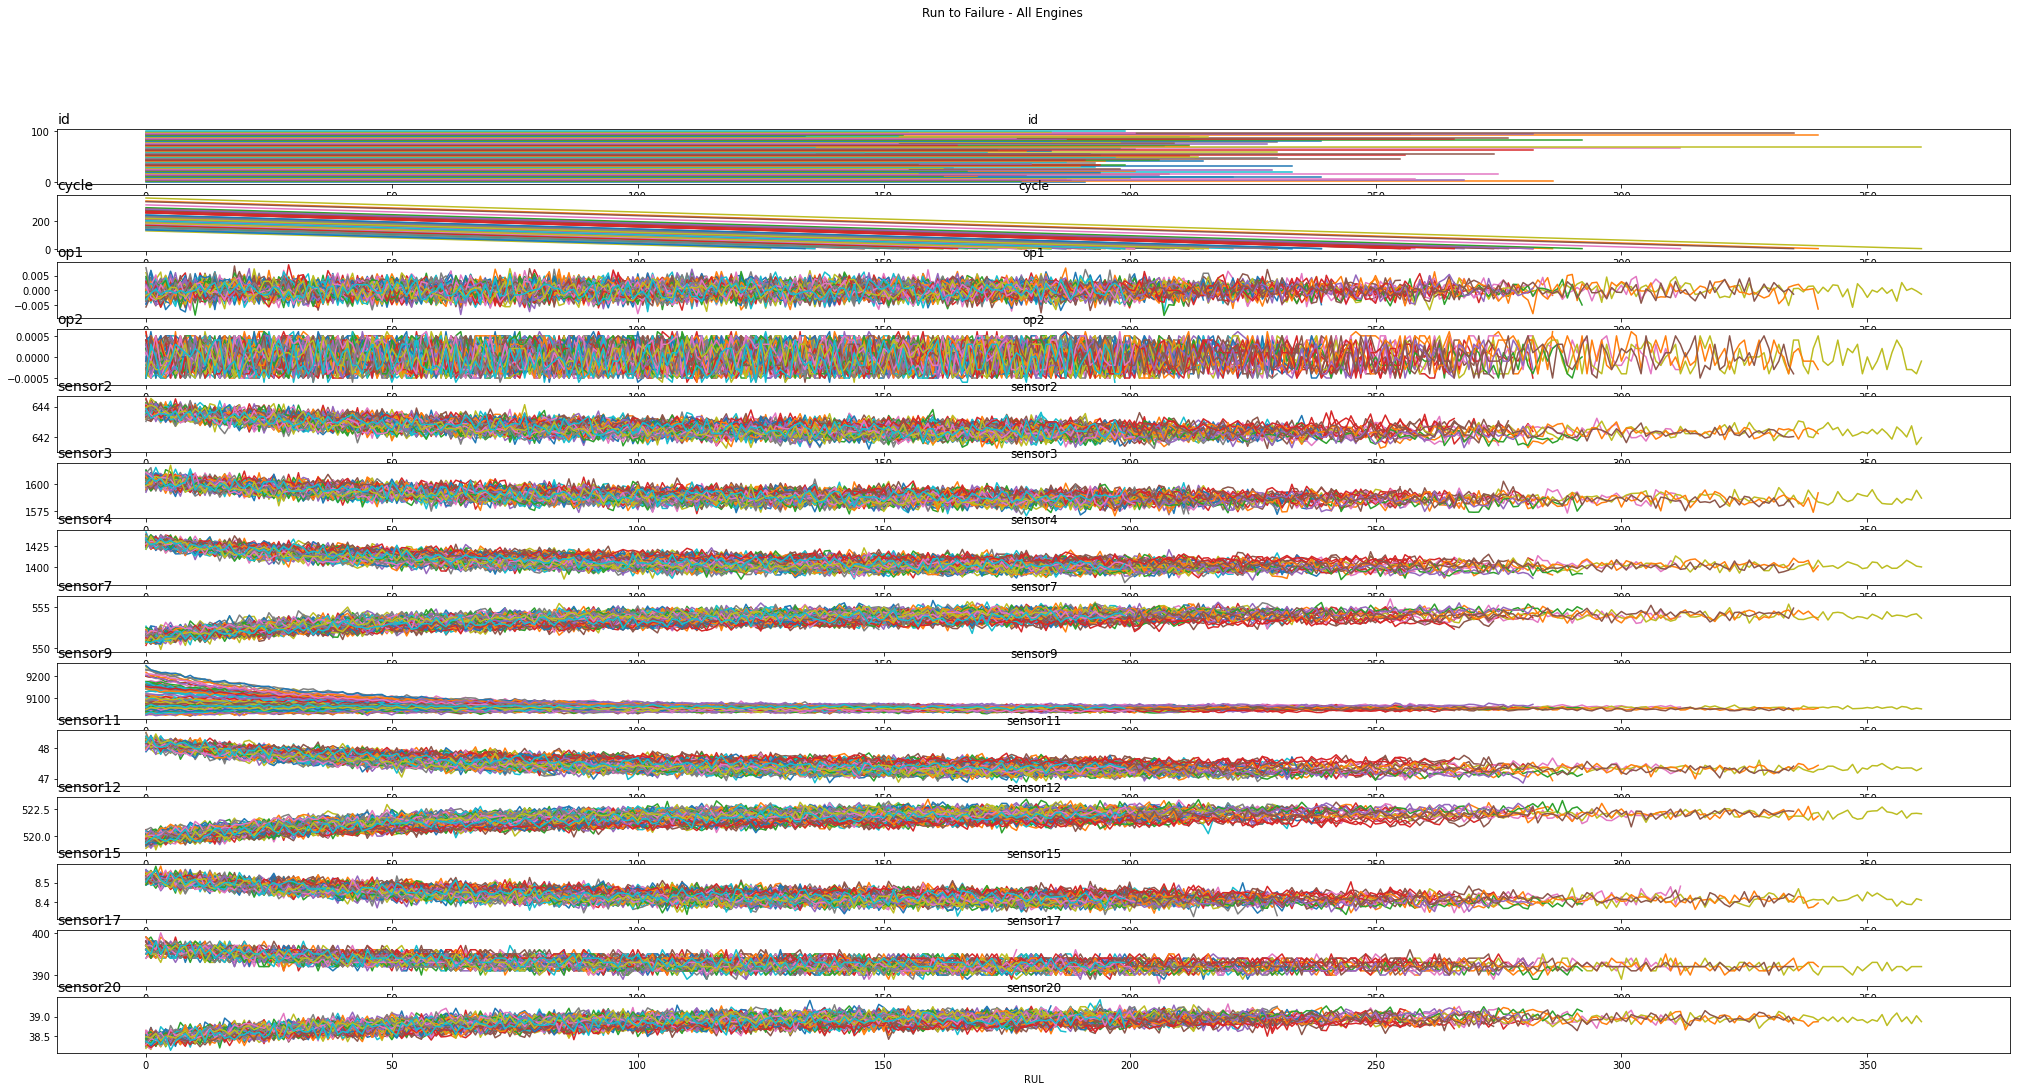

In [62]:
# Add Remaining Useful Life (RUL) to dataset.
df_train_proc2 = add_calculated_rul(df_train_proc2)

print(rul_dataset.head())

# Visualise sensor behaviour against RUL.
plt.figure(figsize=(35, 17))
fig = plot_time_history_all_engines(df_train_proc2)

In [14]:
# Remove data that doe snot change with time